# Spotify Top 50 Tracks of 2020 Dataset analysis

## In this analysis, we will be looking into the Top 50 Tracks of 2020 on Spotify to analyze what genres and artists received the most attention, as well as do some comparison on numeric values by genre to quantify what makes a hit song.

### First, we import the dataset and check what we're working with, as well as the main library we will use for analysis - pandas. We also import seaborn and matplotlib for some visualization capabilities.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv("spotifytoptracks.csv",index_col=0)
dataset.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


There seem to be quite a lot of vague numeric features about each track. However, we might not be too interested in them for the majority of our analysis.

### We clean the dataset by removing most of the features we will not be needing for now.

In [2]:
clean_dataset = (
    dataset
    .drop(columns=["track_id","energy","danceability","key","loudness","acousticness","speechiness","instrumentalness","liveness","valence","tempo","duration_ms"])
    .assign(genre = lambda x: x["genre"].str.title().str.strip().str.split("/"))
    .rename(columns={"track_name": "track name"})
)
clean_dataset.head()

,artist,album,track name,genre
0,The Weeknd,After Hours,Blinding Lights,"[R&B, Soul]"
1,Tones And I,Dance Monkey,Dance Monkey,"[Alternative, Indie]"
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,"[Hip-Hop, Rap]"
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,"[Dance, Electronic]"
4,Dua Lipa,Future Nostalgia,Don't Start Now,[Nu-Disco]


Now the dataset looks cleaner, and the genres have been split by category for any possible further analysis.

### We check whether there are any missing values in the dataset.

In [3]:
dataset.isna().any().any()

np.False_

Seems like there are none, great!

### We check if there are any duplicate values or features in the dataset.

In [4]:
print(len(dataset[dataset.duplicated()]))
print(len(dataset.columns[dataset.columns.duplicated()]))

0
0


No duplicate values as well, which is expected from unique tracks.

### How many observations are there in this dataset?

In [5]:
len(dataset)

50

As expected, we are working with the Top 50 tracks dataset, so we have 50 observations.

### How many features does this dataset have?

In [6]:
len(dataset.columns)

16

We have a total of 16 features that we can use to compare all of our tracks with.

### Which of the features are categorical?

In [7]:
categorical = [x for x in dataset if dataset[x].dtype == "object"]
categorical

['artist', 'album', 'track_name', 'track_id', 'genre']

Most of these 5 categorical features can help us sort the data in a visually quickly understandable way (for example alphabetically)

### Which of the features are numeric?

In [8]:
numeric = [x for x in dataset if dataset[x].dtype in ["int64","float64"]]
numeric

['energy',
 'danceability',
 'key',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

With 11 numeric features, we can do a lot of mathematical comparison between tracks to get various results.

### Let's check for outliers.

In [9]:
dataset[numeric].agg(["min","median","max","std"])

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
min,0.225000,0.351000,0.000000,-14.454000,0.00146,0.029000,0.000000,0.05740,0.060500,75.801000,140526.000000
median,0.597000,0.746000,6.500000,-5.991500,0.18850,0.070050,0.000000,0.11100,0.560000,116.969000,197853.500000
max,0.855000,0.935000,11.000000,-3.280000,0.93400,0.487000,0.657000,0.79200,0.925000,180.067000,312820.000000
std,0.154348,0.124975,3.709007,2.349744,0.26525,0.116836,0.094312,0.17661,0.216386,25.414778,33996.122488


We can see that some songs have high acousticness, speechiness and liveness values compared to the median. These values just seem to be at the top end, but they do not seem illogical.

Also, most songs seem to have no instrumentalness value. This raises a question to how Spotify evaluates this specific feature in a song.

### Which (if any) artists have more than 1 popular track, and how many?

In [10]:
popular_artists = dataset["artist"].value_counts()
popular_artists.head()
popular_artists[popular_artists > 1]

artist
Dua Lipa         3
Billie Eilish    3
Travis Scott     3
Harry Styles     2
Lewis Capaldi    2
Justin Bieber    2
Post Malone      2
Name: count, dtype: int64

It seems like 7 artists that year appeared in the Top 50 more than once.

### Who was the most popular artist?

In [11]:
most_popular_artists = popular_artists[popular_artists == popular_artists.max()]
print(f"Most popular artist(s): {', '.join(most_popular_artists.index)}")

Most popular artist(s): Dua Lipa, Billie Eilish, Travis Scott


A total of 3 artists stood in the top with the same number of songs appearing in the Top 50.

### How many artists in total have their songs in the Top 50?

In [12]:
len(popular_artists)

40

In total we had 40 different artists that had their songs in the Top 50.

### Which (if any) albums have more than 1 popular track, and how many?

In [13]:
popular_albums = dataset["album"].value_counts()
popular_albums[popular_albums > 1]

album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64

Since we had 7 artists appear in the Top 50 more than once, there's no surprise that some of their most popular songs came from the same albums.

### How many albums in total have their songs in the Top 50?

In [14]:
len(popular_albums)

45

A total of 45 unique albums - this matches the fact that some albums appeared in the Top 50 more than once.

### Which tracks have a danceability score above 0.7?

In [15]:
danceability_above_tresh = dataset["danceability"] > 0.7
clean_dataset[danceability_above_tresh].set_index("track name")

,artist,album,genre
track name,,,
Dance Monkey,Tones And I,Dance Monkey,"[Alternative, Indie]"
The Box,Roddy Ricch,Please Excuse Me For Being Antisocial,"[Hip-Hop, Rap]"
Roses - Imanbek Remix,SAINt JHN,Roses (Imanbek Remix),"[Dance, Electronic]"
Don't Start Now,Dua Lipa,Future Nostalgia,[Nu-Disco]
ROCKSTAR (feat. Roddy Ricch),DaBaby,BLAME IT ON BABY,"[Hip-Hop, Rap]"
death bed (coffee for your head),Powfu,death bed (coffee for your head),"[Hip-Hop, Rap]"
Falling,Trevor Daniel,Nicotine,"[R&B, Hip-Hop Alternative]"
Tusa,KAROL G,Tusa,[Pop]
Blueberry Faygo,Lil Mosey,Certified Hitmaker,"[Hip-Hop, Rap]"


It seems like quite a lot of tracks had a high danceability value. Looking at it quickly, it seems like the Hip-Hop and Pop genres take up the majority.

### Which tracks have a danceability score below 0.4?

In [16]:
danceability_below_tresh = dataset["danceability"] < 0.4
clean_dataset[danceability_below_tresh].set_index("track name")

,artist,album,genre
track name,,,
lovely (with Khalid),Billie Eilish,lovely (with Khalid),[Chamber Pop]


Only one track, with the genre of Chamber Pop seems to have such a low danceability value. However, we would need a bigger dataset specified to this genre to make accurate conclusions about how this genre relates to danceability.

### Which tracks have their loudness above -5?

In [17]:
loudness_above_tresh = dataset["loudness"] > -5
clean_dataset[loudness_above_tresh].set_index("track name")

,artist,album,genre
track name,,,
Don't Start Now,Dua Lipa,Future Nostalgia,[Nu-Disco]
Watermelon Sugar,Harry Styles,Fine Line,[Pop]
Tusa,KAROL G,Tusa,[Pop]
Circles,Post Malone,Hollywood's Bleeding,"[Pop, Soft Rock]"
Before You Go,Lewis Capaldi,Divinely Uninspired To A Hellish Extent (Exten...,"[Alternative, Indie]"
Say So,Doja Cat,Hot Pink,"[R&B, Soul]"
Adore You,Harry Styles,Fine Line,[Pop]
Mood (feat. iann dior),24kGoldn,Mood (feat. iann dior),[Pop Rap]
Break My Heart,Dua Lipa,Future Nostalgia,"[Dance-Pop, Disco]"


The higher the loudness value is, the louder the song is. It seems like quite a lot of songs had a higher loudness value, and Dua Lipa seems to have the most tracks in this treshold.

### Which tracks have their loudness below -8?

In [18]:
loudness_below_tresh = dataset["loudness"] < -8
clean_dataset[loudness_below_tresh].set_index("track name")

,artist,album,genre
track name,,,
death bed (coffee for your head),Powfu,death bed (coffee for your head),"[Hip-Hop, Rap]"
Falling,Trevor Daniel,Nicotine,"[R&B, Hip-Hop Alternative]"
Toosie Slide,Drake,Dark Lane Demo Tapes,"[Hip-Hop, Rap]"
Savage Love (Laxed - Siren Beat),Jawsh 685,Savage Love (Laxed - Siren Beat),"[Hip-Hop, Rap]"
everything i wanted,Billie Eilish,everything i wanted,[Pop]
bad guy,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",[Electro-Pop]
HIGHEST IN THE ROOM,Travis Scott,HIGHEST IN THE ROOM,"[Hip-Hop, Rap]"
lovely (with Khalid),Billie Eilish,lovely (with Khalid),[Chamber Pop]
If the World Was Ending - feat. Julia Michaels,JP Saxe,If the World Was Ending (feat. Julia Michaels),[Pop]


These songs were not as loud as the previous ones, and it seems like Billie Eilish appeared the most here.

### Let's check the length of songs visually.

<Axes: title={'center': 'Length of songs'}, xlabel='track_name'>

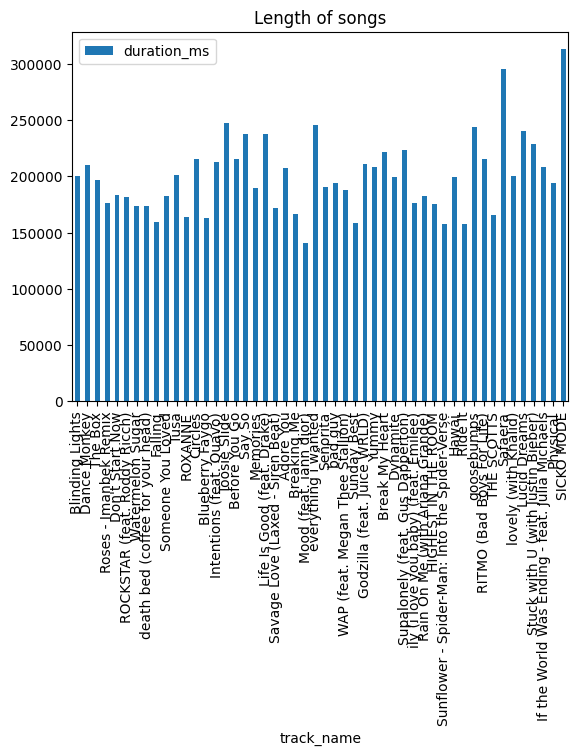

In [19]:
dataset.plot.bar(x="track_name", y="duration_ms", title="Length of songs")

We can see that the length of the songs does not vary that drastically besides a few really long songs.

### Which track is the longest?

In [20]:
longest = dataset["duration_ms"].idxmax()
longest_info = clean_dataset.loc[longest]
longest_length = pd.to_datetime(dataset.loc[longest]["duration_ms"], unit="ms").strftime("%M:%S")
print(longest_info)
print(longest_length)

artist          Travis Scott
album             ASTROWORLD
track name        SICKO MODE
genre         [Hip-Hop, Rap]
Name: 49, dtype: object
05:12


Seems like Travis Scott's SICKO MODE was the longest song in the list, with the length of 5:12.

### Which track is the shortest?

In [21]:
shortest = dataset["duration_ms"].idxmin()
shortest_info = clean_dataset.loc[shortest]
shortest_length = pd.to_datetime(dataset.loc[shortest]["duration_ms"], unit="ms").strftime("%M:%S")
print(shortest_info)
print(shortest_length)

artist                      24kGoldn
album         Mood (feat. iann dior)
track name    Mood (feat. iann dior)
genre                      [Pop Rap]
Name: 23, dtype: object
02:20


Mood (feat. iann dior), by 24kGoldn, with the length of 2:20 was the shortest song in the Top 50.

### Which genre is the most popular?

In [22]:
popular_genres = clean_dataset["genre"].explode().value_counts()
most_popular_genres = popular_genres[popular_genres == popular_genres.max()]
print(f"Most popular genre(s): {', '.join(most_popular_genres.index)}")

Most popular genre(s): Hip-Hop, Pop


Seems like Hip-Hop and Pop were the most popular genres in 2020.

### Which genres have just one song on the Top 50?

In [23]:
popular_genres[popular_genres == 1].index.to_list()

['Nu-Disco',
 'Hip-Hop Alternative',
 'Soft Rock',
 'Pop Rap',
 'Trap',
 'Dance-Pop',
 'Disco',
 'Disco-Pop',
 'Dreampop',
 'Reggaeton',
 'Experimental',
 'Chamber Pop']

There seem to be quite a lot of niche or very specific genres in the Top 50, such as Dreampop or Nu-Disco.

### How many genres in total are represented in the top 50?

In [24]:
len(popular_genres)

22

In total, we have 22 unique genres in the Top 50, which means nearly every 2nd song is of a unique genre.

### Which features are strongly positively and negatively correlated?

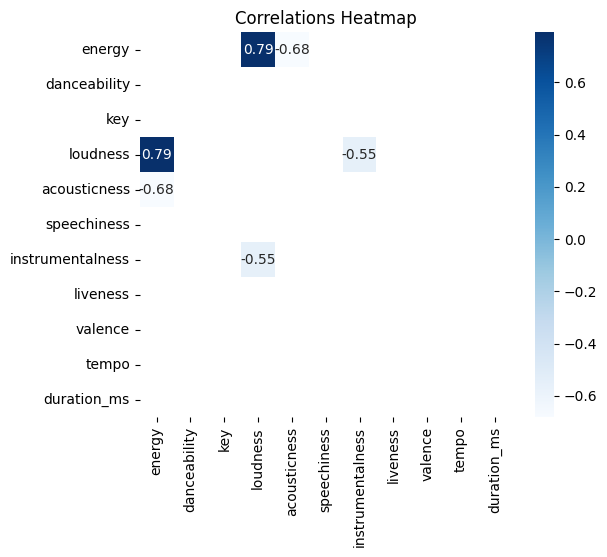

In [25]:
correlations = dataset[numeric].corr()
strong_correlation_mask = (correlations >= -0.5) & (correlations <= 0.5) | (correlations == 1)
plt.figure(figsize=(6, 5))
sns.heatmap(correlations, cmap="Blues", annot=True, mask=strong_correlation_mask)
plt.title("Correlations Heatmap")
plt.show()

For the strongly positive corelation, we get energy-loudness, which makes sense, since louder songs feel more energetic.

For the strongly negative corelation, we see acousticness with energy, as well as instrumentalness with loudness. It makes sense, as instrumental songs are usually more quiet, and acoustic songs are less energetic.

### We can also confirm this by filtering our dataframe.

In [26]:
strong_positive_correlations = (correlations[(correlations > 0.5) & (correlations < 1)]
                                .dropna(axis="rows",how="all")
                                .dropna(axis="columns",how="all")
                                )
strong_negative_correlations = (correlations[(correlations < -0.5)]
                                .dropna(axis="rows",how="all")
                                .dropna(axis="columns",how="all")
                                )
print("Strong positive correlations:", set(tuple(sorted(pair)) for pair in strong_positive_correlations.stack().index))
print("Strong negative correlations:", set(tuple(sorted(pair)) for pair in strong_negative_correlations.stack().index))

Strong positive correlations: {('energy', 'loudness')}
Strong negative correlations: {('instrumentalness', 'loudness'), ('acousticness', 'energy')}


### Which features are not correlated?

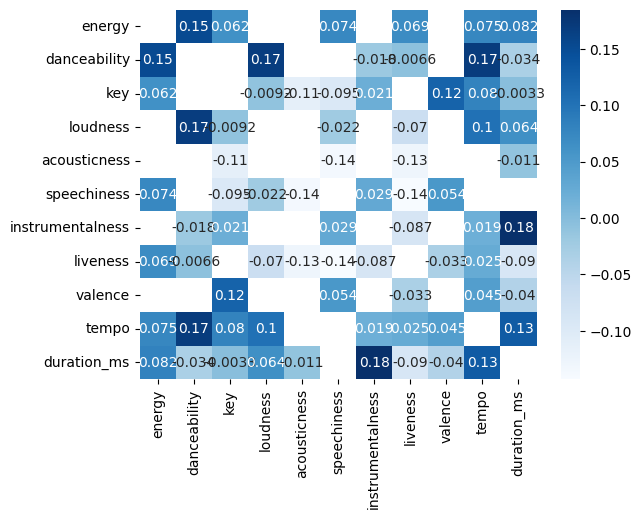

Weak correlations:  {('energy', 'key'), ('duration_ms', 'energy'), ('acousticness', 'key'), ('energy', 'liveness'), ('acousticness', 'liveness'), ('instrumentalness', 'key'), ('duration_ms', 'tempo'), ('duration_ms', 'loudness'), ('instrumentalness', 'liveness'), ('duration_ms', 'instrumentalness'), ('danceability', 'liveness'), ('loudness', 'speechiness'), ('acousticness', 'speechiness'), ('energy', 'speechiness'), ('key', 'valence'), ('loudness', 'tempo'), ('energy', 'tempo'), ('key', 'speechiness'), ('instrumentalness', 'speechiness'), ('danceability', 'energy'), ('liveness', 'valence'), ('key', 'tempo'), ('instrumentalness', 'tempo'), ('tempo', 'valence'), ('danceability', 'tempo'), ('key', 'loudness'), ('liveness', 'speechiness'), ('danceability', 'loudness'), ('liveness', 'tempo'), ('danceability', 'instrumentalness'), ('acousticness', 'duration_ms'), ('liveness', 'loudness'), ('duration_ms', 'liveness'), ('duration_ms', 'key'), ('danceability', 'duration_ms'), ('speechiness', 'v

In [27]:
weak_correlation_mask = (correlations >= 0.2) | (correlations <= -0.2) | (correlations == 1)
sns.heatmap(correlations, cmap="Blues", annot=True, mask=weak_correlation_mask)
plt.show()

weak_correlations = (correlations[(correlations >= -0.2) & (correlations <= 0.2)]
                                .dropna(axis="rows",how="all")
                                .dropna(axis="columns",how="all")
                                )
print("Weak correlations: ", set(tuple(sorted(pair)) for pair in weak_correlations.stack().index))

We can see that the rest of the features and the majority of their combinations have very weak correlations that are not worth noting.

### How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [28]:
genres_of_interest = ["Pop","Hip-Hop/Rap","Dance/Electronic","Alternative/Indie"]
def score_comparison(genres, feature):
    return (dataset.set_index("genre")
        .loc[genres, feature]
        .groupby("genre")
        .agg(["mean","min","max"])
        .sort_values(by="mean")
    )

score_comparison(genres_of_interest,"danceability")

,mean,min,max
genre,,,
Alternative/Indie,0.661750,0.459,0.862
Pop,0.677571,0.464,0.806
Dance/Electronic,0.755000,0.647,0.880
Hip-Hop/Rap,0.765538,0.598,0.896


It seems like Alternative/Indie and Pop genres have a very similar danceability score on average, while Dance/Electronic and Hip-Hop/Rap genres are very close to each other as well. However, these 2 groups seems to have a quite a notable distance from each other.

### How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [29]:
score_comparison(genres_of_interest,"loudness")

,mean,min,max
genre,,,
Hip-Hop/Rap,-6.917846,-8.820,-3.370
Pop,-6.460357,-14.454,-3.280
Alternative/Indie,-5.421000,-6.401,-4.746
Dance/Electronic,-5.338000,-7.567,-3.756


This time, Hip-Hop/Rap and Pop, as well as Alternative/Indie and Dance/Electronic are the groups closer to each other. We can determine that the latter group is generally louder.

### How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [30]:
score_comparison(genres_of_interest,"acousticness")

,mean,min,max
genre,,,
Dance/Electronic,0.099440,0.01370,0.223
Hip-Hop/Rap,0.188741,0.00513,0.731
Pop,0.323843,0.02100,0.902
Alternative/Indie,0.583500,0.29100,0.751


Now we see quite a difference between each group. The Dance/Electronic genre seems to have the lowest average acousticness score, followed by Hip-Hop/Rap (almost a 10% increase of a total possible value), then Pop by another ~14% jump as well, and lastly Alternative/Indie, with an impressive 26% increase.

## Conclusion

We compared the dataset and found that the Hip-Hop and Pop songs were the most popular this year. However, we did have quite a few unique genres appearing in the top (almost half as many genres as there were songs). To check whether those genres could be rising in popularity, we would need to compare the dataset of 2019 or 2021.

Even 7 artists managed to get their songs to the Top 50 more than once, with Dua Lipa, Billie Eilish and Travis Scott doing so 3 times. It seems like these artists might have a better fan engagement or music production quality.

As for music characteristics, it seems like songs with a higher danceability and loudness score appeared way more often than those with lower scores. This suggests that most Spotify users prefer louder, upbeat songs.

We also noted that energy and loudness features are very strongly correlated, as most loud songs will be more energetic. Furthermore, songs that have higher acousticness and instrumentalness values will be less energetic and more silent, respectively.

## Further improvements

Comparing this dataset to 2019's or 2021's Top 50 would allow us to see a pattern in which genres may be becoming more popular or irrelevant, and how specific values such as danceability may relate to the genres themselves.

We could also apply more detailed data visualization for an easier representation of correlation between values, which would help us more quickly determine patterns.

If possible, obtaining the lyrics of each song would help us compare whether more or less lyrical songs are popular. Maybe instrumental songs could even be the most top rated?

Lastly, we could compare this dataset to the same year's dataset on other similar platforms, such as SoundCloud or Youtube Music to see whether users of these different platforms have drastically different preferences for music.